In [1]:
# this code is for building linear regression models to predict the non marker genes 
# to find out :
# how much the g1 g2 residuals are correlated in ad and how much they are correlated in control
# and what is the difference between them (DC of residuals)

In [2]:
import pandas as pd 
import scipy.stats as sp
df=pd.read_excel(open('newoutput_34_NM_NM.xlsx', 'rb'),sheet_name='Sheet1')
# reading from the 34 matrix
# this dataframe contains only the marker genes and their corresponding cell types 
# this dataframe contains the marker genes for the BM36 AND BM 44 regions 


In [3]:
import numpy as np
np.tanh(0.68)

0.5915193954318165

In [4]:
ad_36=pd.read_csv("AD_36.csv")
ad_44=pd.read_csv("AD_44.csv")
ctl_36=pd.read_csv("CTL_36.csv")
ctl_44=pd.read_csv("CTL_44.csv")
# THE BELOW ARE THE CELL TYPE FREQUENCY DATA FOR THE ABOVE DATASETS 
ad_36_cts=pd.read_csv("AD_36_cts.csv")
ad_44_cts=pd.read_csv("AD_44_cts.csv")
ctl_36_cts=pd.read_csv("CTL_36_cts.csv")
ctl_44_cts=pd.read_csv("CTL_44_cts.csv")

In [5]:
ad_36_cts=ad_36_cts.iloc[:,1:len(ad_36_cts.columns)]
ad_44_cts=ad_44_cts.iloc[:,1:len(ad_44_cts.columns)]
ctl_36_cts=ctl_36_cts.iloc[:,1:len(ctl_36_cts.columns)]
ctl_44_cts=ctl_44_cts.iloc[:,1:len(ctl_44_cts.columns)]

In [6]:
from sklearn.linear_model import LinearRegression
import numpy as np
import scipy.stats as sp
from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
# Xtrain is gonna be the corresponding to the ad/ctl cell type frequencies datasets 
# we can make some split in this dataset as 70:30
# for every data point in the newoutput_34 dataset
# we have to pick the corresponding columns from the ad_36 and ad_44 datasets
# and build two LR models for both of them using ad_36_cts and ad_44_cts datasets
# we calculate the residual vectors for both these genes and find the correlation_ad
# we do the the same process above and find the correlation_ctl and then subract both to get the DC

In [7]:
gene_list=[set(ad_36.columns),set(ad_44.columns),set(ctl_36.columns),set(ctl_44.columns)]
gene_list=set.intersection(*gene_list)
# this is the entire set of genes which are present in the above mentioned datasets 

In [8]:
import math
# in the previous work we have found out the correlation between g1,g2 in ad and also in ctl and found out the 
# difference between the correlation to get the differential correlation


# but here we find out the correlation between the residual of g1, residual of g2 in ad and ctl and find the difference 
# difference between them is the DC_residual
list1=[]
list2=[]
temp=[]
cnt=0
X1=ad_36_cts
X2=ad_44_cts
X3=ctl_36_cts
X4=ctl_44_cts
for i, j in df.iterrows():
    gene1=j['g1']
    gene2=j['g2']
    if gene1 in gene_list and gene2 in gene_list:
        y_train1=ad_36[gene1]
        y_train2=ad_44[gene2]
        y_train3=ctl_36[gene1]
        y_train4=ctl_44[gene2]
#         X_train1, X_test1, y_train1, y_test1 = train_test_split(X1,Y1,test_size=0.0, random_state=42)
#         X_train2, X_test2, y_train2, y_test2 = train_test_split(X2,Y2,test_size=0.0, random_state=42)
#         X_train3, X_test3, y_train3, y_test3 = train_test_split(X3,Y3,test_size=0.0, random_state=42)
#         X_train4, X_test4, y_train4, y_test4 = train_test_split(X4,Y4,test_size=0.0, random_state=42)
        X_train1=X1
        X_train2=X2
        X_train3=X3
        X_train4=X4
        # models corresponding to AD
        admodel1=LinearRegression().fit(X_train1,y_train1) 
        admodel2=LinearRegression().fit(X_train2,y_train2)
        # models corresponding to control
        ctlmodel1=LinearRegression().fit(X_train3,y_train3) 
        ctlmodel2=LinearRegression().fit(X_train4,y_train4)
        # these are the predictions for the ad samples
        ad_predictions_gene1=admodel1.predict(X_train1)
        ad_predictions_gene2=admodel2.predict(X_train2)
        # these are the predictions for the control samples 
        ctl_predictions_gene1=ctlmodel1.predict(X_train3)
        ctl_predictions_gene2=ctlmodel2.predict(X_train4)
        # the below residuals are for ad samples 
        ad_residual_gene1=y_train1-ad_predictions_gene1
        ad_residual_gene2=y_train2-ad_predictions_gene2
        # the below residuals are for control samples 
        ctl_residual_gene1=y_train3-ctl_predictions_gene1
        ctl_residual_gene2=y_train4-ctl_predictions_gene2
        
        list1.append(sp.spearmanr(ad_residual_gene1,ad_residual_gene2)[0])
        # the above list contains the correlation between the two genes in ad group
        list2.append(sp.spearmanr(ctl_residual_gene1,ctl_residual_gene2)[0])
        # the above list contains the correlation between the two genes in control group
    else:
        list1.append(-math.inf)
        list2.append(-math.inf)

In [9]:
df2=pd.read_excel(open('plotsheet_NM_NM.xlsx', 'rb'),sheet_name='Sheet1')
len(df2)

5010

In [10]:
def remove_values_from_list(the_list, val):
    return [value for value in the_list if value != val]

In [11]:
list1=remove_values_from_list(list1,-math.inf)
list2=remove_values_from_list(list2,-math.inf)

In [12]:
len(list2)

5010

In [13]:
import numpy as np
df2['DC_gene_res_nm']=np.array(list1)-np.array(list2)
df2['corr_gene_ad_res_nm']=list1
df2['corr_gene_ctl_res_nm']=list2

In [14]:
df2.to_csv('residual_nm_nm.csv')

In [15]:
df2

,Unnamed: 0,Unnamed: 0.1,g1,g2,m1,m2,DC_gene_nm,corr_gene_ad_nm,corr_gene_ctl_nm,DC_gene_res_nm,corr_gene_ad_res_nm,corr_gene_ctl_res_nm
0,0,5,RHNO1,MT-ND1,NM,NM,0.717079,0.601015,-0.116064,0.439574,0.389663,-0.049911
1,2,7,MECR,MT-ND2,NM,NM,0.639624,0.596782,-0.042842,0.253658,0.300989,0.047331
2,3,8,RHNO1,MT-ND2,NM,NM,0.852833,0.678121,-0.174712,0.489997,0.422186,-0.067812
3,4,9,PSPH,MT-CO1,NM,NM,-0.751463,-0.664809,0.086654,-0.464803,-0.516166,-0.051363
4,5,10,BMS1P20,MT-CO1,NM,NM,0.776392,0.601015,-0.175377,0.529828,0.359049,-0.170779
5,19,27,RHNO1,MT-ND4L,NM,NM,0.741174,0.699301,-0.041873,0.399048,0.400580,0.001532
6,21,29,RHNO1,MT-ND4,NM,NM,0.687189,0.630039,-0.057150,0.407052,0.416002,0.008950
7,23,31,USP2-AS1,MT-ND5,NM,NM,0.641894,0.678356,0.036462,0.210340,0.317097,0.106757
8,24,32,RHNO1,MT-ND5,NM,NM,0.753029,0.671003,-0.082025,0.422860,0.401573,-0.021287
9,25,33,HTR7P1,MT-ND5,NM,NM,0.673000,0.661873,-0.011128,0.322029,0.347024,0.024996


In [16]:
import matplotlib.pyplot as plt

In [17]:
def make_plot(x,y,disease_state,xl,yl):
    plt.plot(x, y, 'o', color='red')
    plt.xlabel(xl)
    plt.ylabel(yl)
    plt.title(disease_state)
    plt.show()

In [18]:
df2[['DC_gene_nm','DC_gene_res_nm']].to_csv('nm_nm_plot.csv',columns=['DC_gene_nm','DC_gene_res_nm'])

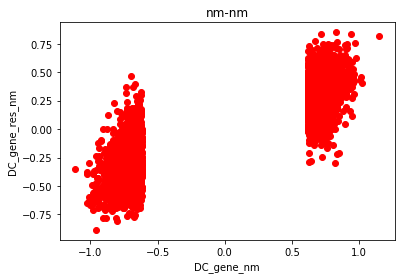

In [19]:
make_plot(df2['DC_gene_nm'],df2['DC_gene_res_nm'],"nm-nm",'DC_gene_nm','DC_gene_res_nm')

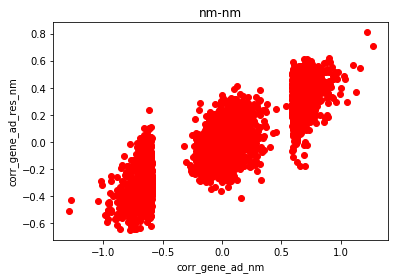

In [20]:
make_plot(df2['corr_gene_ad_nm'],df2['corr_gene_ad_res_nm'],"nm-nm",'corr_gene_ad_nm','corr_gene_ad_res_nm')

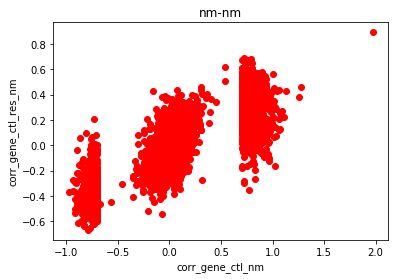

In [21]:
make_plot(df2['corr_gene_ctl_nm'],df2['corr_gene_ctl_res_nm'],"nm-nm",'corr_gene_ctl_nm','corr_gene_ctl_res_nm')

In [22]:
a=np.array(list1)-np.array(list2)
count=0
for i in a :
    if i>-0.2 and i<0.2:
        count+=1

       

In [23]:
count/len(a)

0.23892215568862277

Text(0.5, 1.0, 'NM_NM')

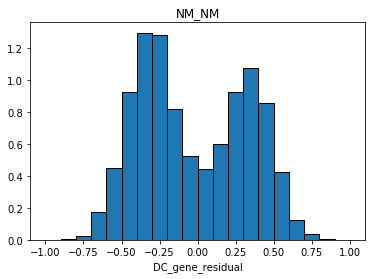

In [24]:
b=plt.hist(a,bins=[-1.0,-0.9,-0.8,-0.7,-0.6,-0.5,-0.4,-0.3,-0.2,-0.1,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0],edgecolor='black',density=True,stacked=True)
plt.xlabel('DC_gene_residual')
plt.title('NM_NM')

Text(0.5, 1.0, 'NM_NM')

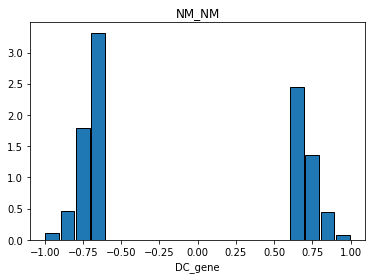

In [25]:
c=plt.hist(df2['DC_gene_nm'],bins=[-1.0,-0.9,-0.8,-0.7,-0.6,-0.5,-0.4,-0.3,-0.2,-0.1,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0],edgecolor='black',rwidth=0.9,density=True,stacked=True)
plt.xlabel('DC_gene')
plt.title('NM_NM')

In [26]:
np.sum(b[0])

9.999999999999998

In [27]:
5/(9902*0.1)

0.005049484952534841

In [28]:
# cor>0.8 or cor<-0.8
# 21
# cor>0.5 or cor<-0.5
# 101
# cor>0.6 or cor<-0.6
# 56

In [29]:
prediction_NM_NM_AD=pd.DataFrame()
prediction_NM_NM_CTL=pd.DataFrame()

In [30]:
prediction_NM_NM_AD['original_value_AD_36']=y_train1
prediction_NM_NM_AD['predicted_value_AD_36']=ad_predictions_gene1
prediction_NM_NM_AD['original_value_AD_44']=y_train2
prediction_NM_NM_AD['predicted_value_AD_44']=ad_predictions_gene2

prediction_NM_NM_CTL['original_value_CTL_36']=y_train3
prediction_NM_NM_CTL['predicted_value_CTL_36']=ctl_predictions_gene1
prediction_NM_NM_CTL['original_value_CTL_44']=y_train4
prediction_NM_NM_CTL['predicted_value_CTL_44']=ctl_predictions_gene2

In [31]:
prediction_NM_NM_CTL.to_csv('prediction_NM_NM_CTL.csv')
prediction_NM_NM_AD.to_csv('prediction_NM_NM_AD.csv')